Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

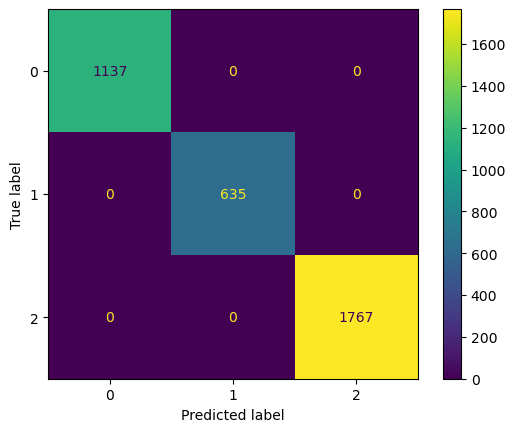

Precisión en conjunto de prueba: 77.63%


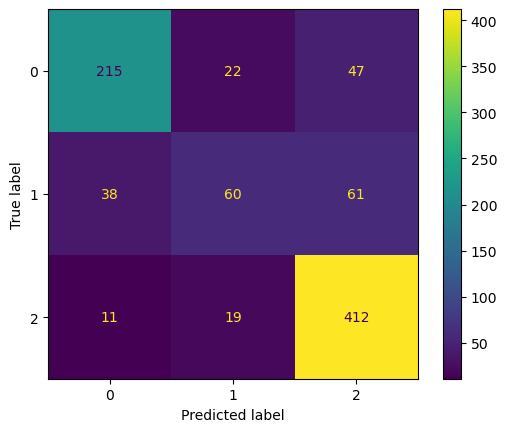


Resultados Iniciales:
                      Model  Training Accuracy %  Testing Accuracy %
0  Random Forest Classifier                100.0           77.627119
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Mejores parámetros encontrados: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Resultados del Modelo Optimizado:
Precisión en conjunto de entrenamiento: 98.11%


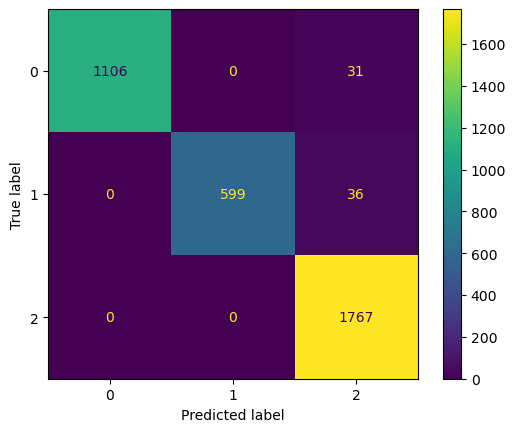

Precisión en conjunto de prueba: 77.51%


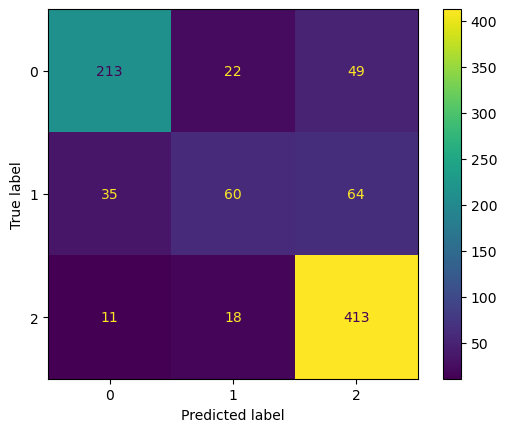


Resultados Finales (Modelo Original y Optimizado):
                                  Model  Training Accuracy %  \
0              Random Forest Classifier            100.00000   
1  Random Forest Classifier (Optimized)             98.10681   

   Testing Accuracy %  
0           77.627119  
1           77.514124  


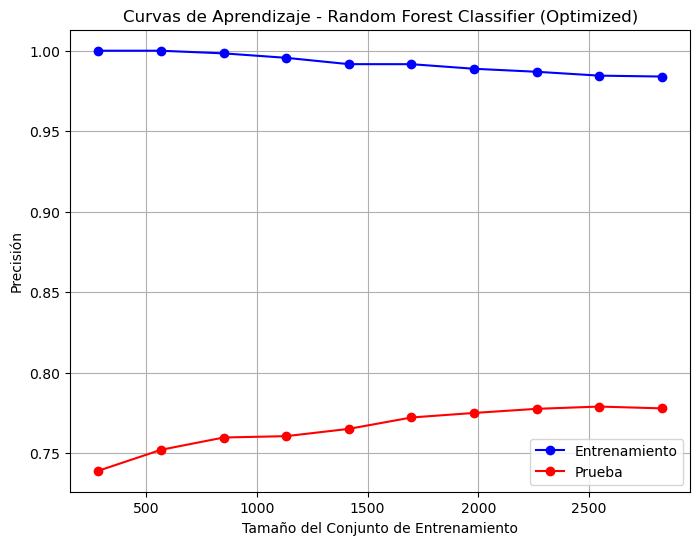

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')

# Cargar el archivo CSV.
file_path = 'data.csv'  
data = pd.read_csv(file_path, delimiter=';')

# Ver las primeras filas del conjunto de datos.
print(data.columns)
print(data.info())
print(data.describe())

# Ver la variable objetivo.
print(data['Target'].unique())
print(data['Target'].value_counts())

# Codificar la variable objetivo (Target).
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])  # ['Dropout', 'Enrolled', 'Graduate']

# Separar características (X) y objetivo (y).
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Escalar las características numéricas.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el clasificador Random Forest.
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

# Función para imprimir puntuaciones y matriz de confusión
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        accuracy = accuracy_score(y_train, pred) * 100
        print(f"Precisión en conjunto de entrenamiento: {accuracy:.2f}%")
        cm = confusion_matrix(y_train, pred)
    else:
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred) * 100
        print(f"Precisión en conjunto de prueba: {accuracy:.2f}%")
        cm = confusion_matrix(y_test, pred)
    
    # Mostrar la matriz de confusión.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.grid(False)
    plt.show()

# Imprimir puntuaciones para el conjunto de entrenamiento y prueba.
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# Calcular las precisiones de los conjuntos de prueba y entrenamiento.
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

# Crear el DataFrame de resultados.
results_df = pd.DataFrame(data=[['Random Forest Classifier', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Mostrar los resultados iniciales.
print("\nResultados Iniciales:")
print(results_df)

# Búsqueda de hiperparámetros con GridSearchCV.
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), params_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros.
best_params = rf_cv.best_params_
print(f'\nMejores parámetros encontrados: {best_params}')

# Crear el modelo optimizado.
optimized_rf_clf = RandomForestClassifier(**best_params)
optimized_rf_clf.fit(X_train, y_train)

# Evaluar el modelo optimizado.
print("\nResultados del Modelo Optimizado:")
print_score(optimized_rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(optimized_rf_clf, X_train, y_train, X_test, y_test, train=False)

# Calcular las precisiones del modelo optimizado.
test_score_opt = accuracy_score(y_test, optimized_rf_clf.predict(X_test)) * 100
train_score_opt = accuracy_score(y_train, optimized_rf_clf.predict(X_train)) * 100

# Agregar los resultados del modelo optimizado al DataFrame.
results_df_opt = pd.DataFrame(data=[['Random Forest Classifier (Optimized)', train_score_opt, test_score_opt]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_opt], ignore_index=True)

# Mostrar los resultados finales.
print("\nResultados Finales (Modelo Original y Optimizado):")
print(results_df)

# Curvas de aprendizaje con el modelo optimizado.
train_sizes, train_scores, test_scores = learning_curve(
    optimized_rf_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Promediar las puntuaciones de entrenamiento y prueba.
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje.
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Prueba', color='red', marker='o')
plt.title('Curvas de Aprendizaje - Random Forest Classifier (Optimized)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

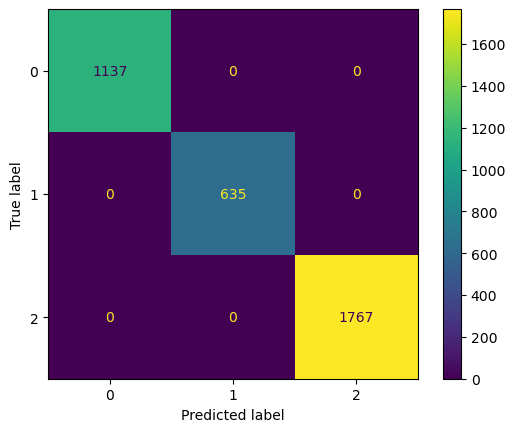

Precisión en conjunto de prueba: 78.42%


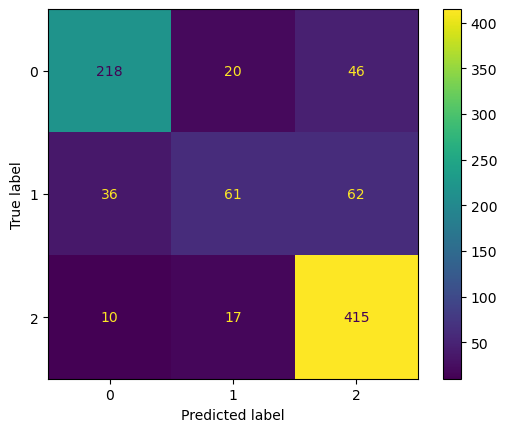


Resultados Iniciales:
                      Model  Training Accuracy %  Testing Accuracy %
0  Random Forest Classifier                100.0           78.418079
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Mejores parámetros encontrados: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}

Resultados del Modelo Optimizado:
Precisión en conjunto de entrenamiento: 89.63%


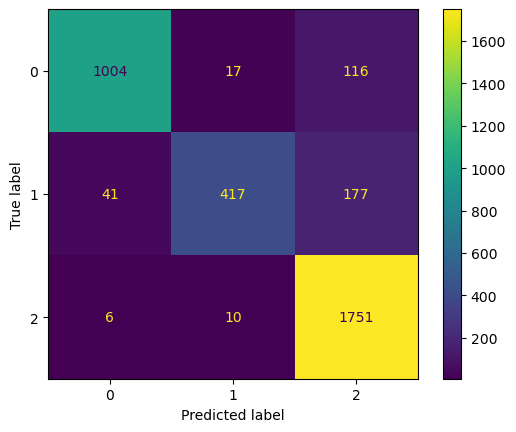

Precisión en conjunto de prueba: 76.50%


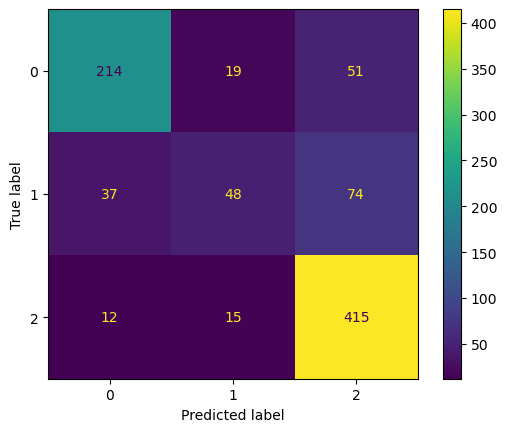


Resultados Finales (Modelo Original y Optimizado):
                                  Model  Training Accuracy %  \
0              Random Forest Classifier           100.000000   
1  Random Forest Classifier (Optimized)            89.629839   

   Testing Accuracy %  
0           78.418079  
1           76.497175  


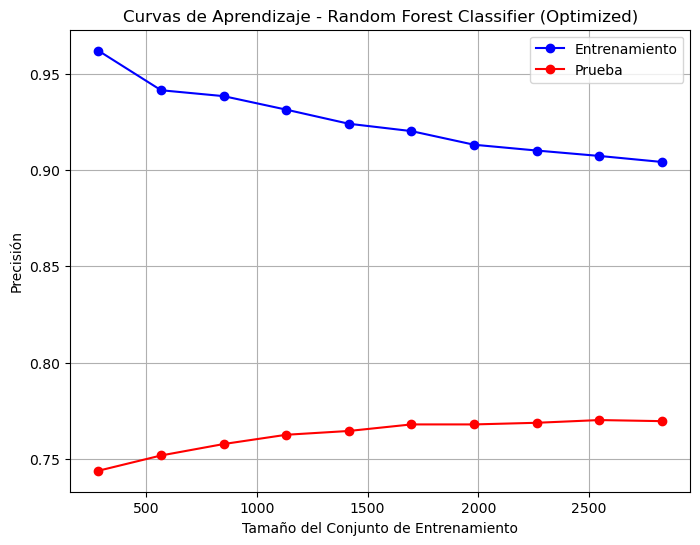

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')

# Cargar el archivo CSV.
file_path = 'data.csv'  
data = pd.read_csv(file_path, delimiter=';')

# Ver las primeras filas del conjunto de datos.
print(data.columns)
print(data.info())
print(data.describe())

# Ver la variable objetivo.
print(data['Target'].unique())
print(data['Target'].value_counts())

# Codificar la variable objetivo (Target).
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])  # ['Dropout', 'Enrolled', 'Graduate']

# Separar características (X) y objetivo (y).
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Escalar las características numéricas.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el clasificador Random Forest.
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(X_train, y_train)

# Función para imprimir puntuaciones y matriz de confusión.
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        accuracy = accuracy_score(y_train, pred) * 100
        print(f"Precisión en conjunto de entrenamiento: {accuracy:.2f}%")
        cm = confusion_matrix(y_train, pred)
    else:
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred) * 100
        print(f"Precisión en conjunto de prueba: {accuracy:.2f}%")
        cm = confusion_matrix(y_test, pred)
    
    # Mostrar la matriz de confusión.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.grid(False)
    plt.show()

# Imprimir puntuaciones para el conjunto de entrenamiento y prueba.
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# Calcular las precisiones de los conjuntos de prueba y entrenamiento.
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

# Crear el DataFrame de resultados.
results_df = pd.DataFrame(data=[['Random Forest Classifier', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Mostrar los resultados iniciales.
print("\nResultados Iniciales:")
print(results_df)

# Búsqueda de hiperparámetros con GridSearchCV.
n_estimators = [500]
max_features = ['auto', 'sqrt']
max_depth = [10]
min_samples_split = [5]
min_samples_leaf = [2]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), params_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros.
best_params = rf_cv.best_params_
print(f'\nMejores parámetros encontrados: {best_params}')

# Crear el modelo optimizado.
optimized_rf_clf = RandomForestClassifier(**best_params)
optimized_rf_clf.fit(X_train, y_train)

# Evaluar el modelo optimizado.
print("\nResultados del Modelo Optimizado:")
print_score(optimized_rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(optimized_rf_clf, X_train, y_train, X_test, y_test, train=False)

# Calcular las precisiones del modelo optimizado.
test_score_opt = accuracy_score(y_test, optimized_rf_clf.predict(X_test)) * 100
train_score_opt = accuracy_score(y_train, optimized_rf_clf.predict(X_train)) * 100

# Agregar los resultados del modelo optimizado al DataFrame.
results_df_opt = pd.DataFrame(data=[['Random Forest Classifier (Optimized)', train_score_opt, test_score_opt]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_opt], ignore_index=True)

# Mostrar los resultados finales.
print("\nResultados Finales (Modelo Original y Optimizado):")
print(results_df)

# Curvas de aprendizaje con el modelo optimizado.
train_sizes, train_scores, test_scores = learning_curve(
    optimized_rf_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Promediar las puntuaciones de entrenamiento y prueba.
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje.
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Prueba', color='red', marker='o')
plt.title('Curvas de Aprendizaje - Random Forest Classifier (Optimized)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

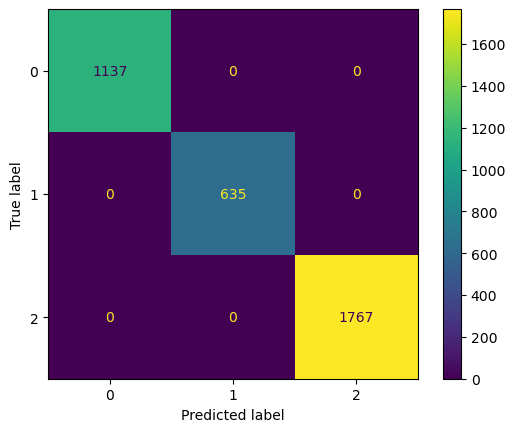

Precisión en conjunto de prueba: 78.42%


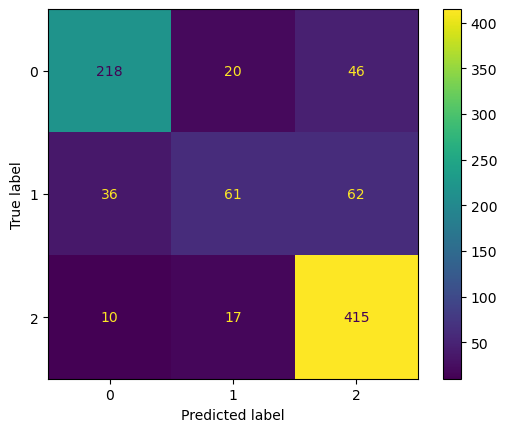


Resultados Iniciales:
                      Model  Training Accuracy %  Testing Accuracy %
0  Random Forest Classifier                100.0           78.418079
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Mejores parámetros encontrados: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}

Resultados del Modelo Optimizado:
Precisión en conjunto de entrenamiento: 87.09%


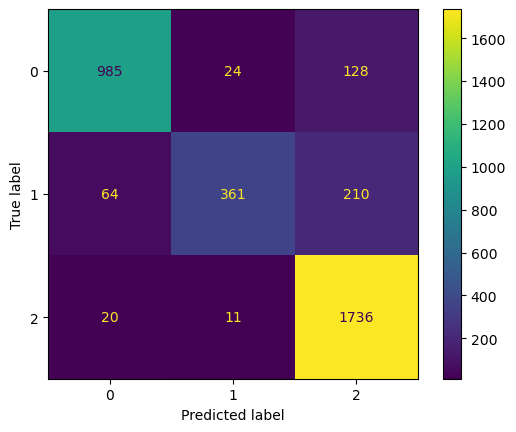

Precisión en conjunto de prueba: 77.18%


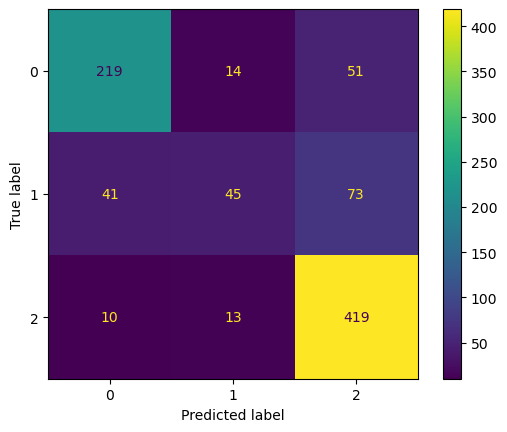


Resultados Finales (Modelo Original y Optimizado):
                                  Model  Training Accuracy %  \
0              Random Forest Classifier           100.000000   
1  Random Forest Classifier (Optimized)            87.086748   

   Testing Accuracy %  
0           78.418079  
1           77.175141  


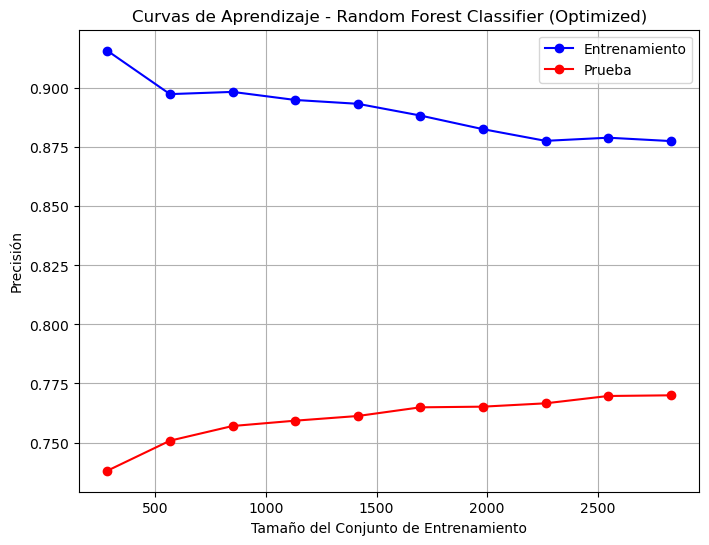

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')

# Cargar el archivo CSV.
file_path = 'data.csv'  
data = pd.read_csv(file_path, delimiter=';')

# Ver las primeras filas del conjunto de datos.
print(data.columns)
print(data.info())
print(data.describe())

# Ver la variable objetivo.
print(data['Target'].unique())
print(data['Target'].value_counts())

# Codificar la variable objetivo (Target).
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])  # ['Dropout', 'Enrolled', 'Graduate']

# Separar características (X) y objetivo (y).
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Escalar las características numéricas.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el clasificador Random Forest.
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(X_train, y_train)

# Función para imprimir puntuaciones y matriz de confusión.
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        accuracy = accuracy_score(y_train, pred) * 100
        print(f"Precisión en conjunto de entrenamiento: {accuracy:.2f}%")
        cm = confusion_matrix(y_train, pred)
    else:
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred) * 100
        print(f"Precisión en conjunto de prueba: {accuracy:.2f}%")
        cm = confusion_matrix(y_test, pred)
    
    # Mostrar la matriz de confusión.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.grid(False)
    plt.show()

# Imprimir puntuaciones para el conjunto de entrenamiento y prueba.
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# Calcular las precisiones de los conjuntos de prueba y entrenamiento.
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

# Crear el DataFrame de resultados.
results_df = pd.DataFrame(data=[['Random Forest Classifier', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Mostrar los resultados iniciales.
print("\nResultados Iniciales:")
print(results_df)

# Búsqueda de hiperparámetros con GridSearchCV.
n_estimators = [1000]
max_features = ['auto', 'sqrt']
max_depth = [10]
min_samples_split = [5]
min_samples_leaf = [4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), params_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Obtener y mostrar los mejores parámetros.
best_params = rf_cv.best_params_
print(f'\nMejores parámetros encontrados: {best_params}')

# Crear el modelo optimizado.
optimized_rf_clf = RandomForestClassifier(**best_params)
optimized_rf_clf.fit(X_train, y_train)

# Evaluar el modelo optimizado.
print("\nResultados del Modelo Optimizado:")
print_score(optimized_rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(optimized_rf_clf, X_train, y_train, X_test, y_test, train=False)

# Calcular las precisiones del modelo optimizado.
test_score_opt = accuracy_score(y_test, optimized_rf_clf.predict(X_test)) * 100
train_score_opt = accuracy_score(y_train, optimized_rf_clf.predict(X_train)) * 100

# Agregar los resultados del modelo optimizado al DataFrame.
results_df_opt = pd.DataFrame(data=[['Random Forest Classifier (Optimized)', train_score_opt, test_score_opt]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_opt], ignore_index=True)

# Mostrar los resultados finales.
print("\nResultados Finales (Modelo Original y Optimizado):")
print(results_df)

# Curvas de aprendizaje con el modelo optimizado.
train_sizes, train_scores, test_scores = learning_curve(
    optimized_rf_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Promediar las puntuaciones de entrenamiento y prueba.
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje.
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Prueba', color='red', marker='o')
plt.title('Curvas de Aprendizaje - Random Forest Classifier (Optimized)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.show()
